<h2> 1. Problem Description </h2>

<p>
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.
</p>
<p>In this competition, Daimler is challenging Kagglers to tackle the curse of dimensionality and reduce the time that cars spend on the test bench. Competitors will work with a dataset representing different permutations of Mercedes-Benz car features to predict the time it takes to pass testing. Winning algorithms will contribute to speedier testing, resulting in lower carbon dioxide emissions without reducing Daimler’s standards.</p>
<p> Credits: https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/overview </p>

<h2>2. Data </h2>

In [12]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading the train dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GITHUB/mercedez/train.csv")

In [5]:
#having a look at the features
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
#shape of the train dataset
df.shape

(4209, 378)

<h2> 3. Performance metric </h2>

<ul>
<li> Submissions are evaluated on the R^2 value, also called the coefficient of determination.

 </li>
</ul>


<h2> 4. Exploratory Data Analysis </h2>

In [7]:
#there are categorical and numerical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
y = df['y']

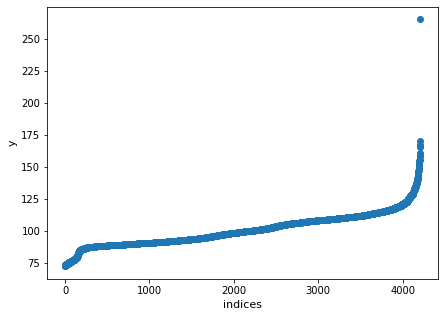

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(range(len(y)), np.sort(y))
plt.xlabel('indices', fontsize=11)
plt.ylabel('y', fontsize=11)
plt.show()

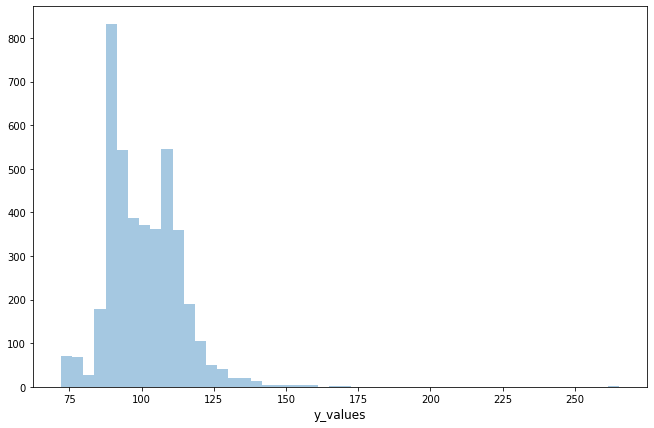

In [13]:
plt.figure(figsize=(11,7))
sns.distplot(y, bins=50, kde=False)
plt.xlabel('y_values', fontsize=12)
plt.show()

In [ ]:
#function to get the column names of categorical features
def categorical(z):
  cat = []
  for i,j in z.dtypes.items():
    if j == 'object':
      cat.append(i)
  print(cat)
categorical(df)

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [ ]:
# finding out if there is null value in any of the columns
sum(df.isnull().any())

0

In [ ]:
# performing the same operations for test dataset
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GITHUB/mercedez/test.csv")
print(sum(test.isnull().any()))
categorical(test)

0
['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [ ]:
#dropping some of the columns
train = df.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','ID','y'],axis = 1)

In [ ]:
train.shape

(4209, 368)

In [ ]:
test.shape

(4209, 377)

In [ ]:
#list(train.columns)

<h2> 5. Preprocessing</h2> 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
vectorizer = OneHotEncoder(handle_unknown='ignore') 

In [ ]:
vectorizer.fit(df['X0'].values.reshape(-1,1))
x0_onehot = vectorizer.transform(df['X0'].values.reshape(-1,1))
x0_testonehot = vectorizer.transform(test['X0'].values.reshape(-1,1))

In [ ]:
x0_testonehot.shape

(4209, 47)

In [ ]:
vectorizer.fit(df['X1'].values.reshape(-1,1))
x1_onehot = vectorizer.transform(df['X1'].values.reshape(-1,1))
x1_testonehot = vectorizer.transform(test['X1'].values.reshape(-1,1))

In [ ]:
x1_testonehot.shape

(4209, 27)

In [ ]:
vectorizer.fit(df['X2'].values.reshape(-1,1))
x2_onehot = vectorizer.transform(df['X2'].values.reshape(-1,1))
x2_testonehot = vectorizer.transform(test['X2'].values.reshape(-1,1))

In [ ]:
x2_testonehot.shape

(4209, 44)

In [ ]:
vectorizer.fit(df['X3'].values.reshape(-1,1))
x3_onehot = vectorizer.transform(df['X3'].values.reshape(-1,1))
x3_testonehot = vectorizer.transform(test['X3'].values.reshape(-1,1))

In [ ]:
x3_testonehot.shape

(4209, 7)

In [ ]:
vectorizer.fit(df['X4'].values.reshape(-1,1))
x4_onehot = vectorizer.transform(df['X4'].values.reshape(-1,1))
x4_testonehot = vectorizer.transform(test['X4'].values.reshape(-1,1))

In [ ]:
x4_testonehot.shape

(4209, 4)

In [ ]:
vectorizer.fit(df['X5'].values.reshape(-1,1))
x5_onehot = vectorizer.transform(df['X5'].values.reshape(-1,1))
x5_testonehot = vectorizer.transform(test['X5'].values.reshape(-1,1))

In [ ]:
x5_testonehot.shape

(4209, 29)

In [ ]:
vectorizer.fit(df['X6'].values.reshape(-1,1))
x6_onehot = vectorizer.transform(df['X6'].values.reshape(-1,1))
x6_testonehot = vectorizer.transform(test['X6'].values.reshape(-1,1))

In [ ]:
x6_testonehot.shape

(4209, 12)

In [ ]:
vectorizer.fit(df['X8'].values.reshape(-1,1))
x8_onehot = vectorizer.transform(df['X8'].values.reshape(-1,1))
x8_testonehot = vectorizer.transform(test['X8'].values.reshape(-1,1))

In [ ]:
x8_testonehot.shape

(4209, 25)

In [ ]:
from scipy.sparse import hstack

train_final = hstack((x0_onehot,x1_onehot,x2_onehot,x3_onehot,x4_onehot,x5_onehot,x6_onehot,x8_onehot))


In [ ]:
train_final.shape

(4209, 195)

In [ ]:
train_final = pd.DataFrame(train_final.toarray())

In [ ]:
train_final = pd.concat([train_final,train],axis=1)

In [ ]:
train_final.shape

(4209, 563)

In [ ]:
testnew = test.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','ID'],axis = 1)

In [ ]:
test_final = hstack((x0_testonehot,x1_testonehot,x2_testonehot,x3_testonehot,x4_testonehot,x5_testonehot,x6_testonehot,x8_testonehot))


In [ ]:
test_final = pd.DataFrame(test_final.toarray())

In [ ]:
test_final = pd.concat([test_final,testnew],axis = 1)

In [ ]:
print(train_final.shape)
print(test_final.shape)

(4209, 563)
(4209, 563)


 <h2> 6.  Machine Learning Models </h2>

<h3> LinearRegression </h3>


In [ ]:
#using LinearRegression from sklearn. but no regularization option available
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_final, y)
reg.score(train_final, y)

0.6174476087805925

In [ ]:
# trying SGDRegressor without hyperparameter tuning
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor().fit(train_final, y)
reg.score(train_final, y)

0.5990003172611317

In [ ]:
# hyperparameter tuning
parameters = {'alpha': [10 ** x for x in range(-5, 2)]}

from sklearn.model_selection import GridSearchCV

reg = SGDRegressor(random_state = 45)

clf = GridSearchCV(reg, parameters,scoring='r2')
clf.fit(train_final, y)



GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=45, shuffle=True,
                                    tol=0.001, validation_fraction=0.1,
                                    verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
#best score on cv data
clf.best_score_

0.5449005675608963

In [ ]:
# standardizing
scaler = StandardScaler()
scaler.fit(train_final)
train_final1 = scaler.transform(train_final)

In [ ]:
parameters = {'alpha': [10 ** x for x in range(-5, 2)]}

from sklearn.model_selection import GridSearchCV

reg = SGDRegressor()

clf = GridSearchCV(reg, parameters,scoring='r2')
clf.fit(train_final1, y)



GridSearchCV(cv=None, error_score=nan,
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=None,
                                    shuffle=True, tol=0.001,
                                    validation_fraction=0.1, verbose=0,
                                    warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [ ]:
#the score is worse than without standardizing
clf.best_score_

0.3502017027581953

<h3> RandomForest </h3>


In [ ]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'n_estimators': [50,60,80,100,110]}

from sklearn.model_selection import GridSearchCV

reg = RandomForestRegressor(random_state=45)

clf = GridSearchCV(reg, parameters,scoring='r2')
clf.fit(train_final, y)



GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
clf.best_score_

0.5338781719303072

<h3> XGBoost</h3>


In [ ]:
import xgboost as xgb
parameters = {'n_estimators': [50,60,80,100,110]}

reg = xgb.XGBRegressor(random_state=45)

clf = GridSearchCV(reg, parameters,scoring='r2')
clf.fit(train_final, y)





[11:26:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:26:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=45,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [50, 60, 80, 100, 110]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [ ]:
clf.best_score_

0.5698530331604921

 <h1> Results </h1>

In [ ]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = [ "Model","Metric","CV-Performance"]

x.add_row(["Linear regression","R^2",0.5449005675608963])
x.add_row(["RF","R^2",0.5338781719303072])
x.add_row(["XGB","R^2",0.5698530331604921])
print(x)

+-------------------+--------+--------------------+
|       Model       | Metric |   CV-Performance   |
+-------------------+--------+--------------------+
| Linear regression |  R^2   | 0.5449005675608963 |
|         RF        |  R^2   | 0.5338781719303072 |
|        XGB        |  R^2   | 0.5698530331604921 |
+-------------------+--------+--------------------+


In [ ]:
#predicting for test data and submitting the result. rank 2046/3823
y_test = clf.predict(test_final)

In [ ]:
sub = pd.DataFrame({'ID':test['ID'],'y':y_test})

In [ ]:
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/GITHUB/mercedez/submission.csv')

In [ ]:
np.sort(y)[-3:]

array([167.45, 169.91, 265.32])

In [ ]:
df[df['y'] == 265.32]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
#removing the outlier
train_final1 = train_final.drop([883])

In [ ]:
y.pop(883)

265.32

In [ ]:
len(y)

4208

In [ ]:
import xgboost as xgb
parameters = {'n_estimators': [50,60,80,100,110]}

reg = xgb.XGBRegressor(random_state=45)

clf = GridSearchCV(reg, parameters,scoring='r2')
clf.fit(train_final1, y)





[13:08:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=45,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [50, 60, 80, 100, 110]},
             pre_dispatch='2*n_jobs', refit=True, return_train

In [ ]:
#good improvement after removing outlier
clf.best_score_

0.5904465867612638

In [ ]:
y_test = clf.predict(test_final)

In [ ]:
sub = pd.DataFrame({'ID':test['ID'],'y':y_test})

In [ ]:
sub.to_csv('/content/drive/MyDrive/Colab Notebooks/GITHUB/mercedez/submission1.csv',index = False)